# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Sariwati Putri Mutiara Sagala
- **Email:** sarisagala7@gmail.com
- **ID Dicoding:** sarisgl

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda dalam beberapa perhitungan hari terakhir?
- Bagaimana distribusi penggunaan sepeda berdasarkan musim?
- Apakah terdapat perbedaan signifikan dalam jumlah penggunaan antara musim-musim tersebut?
- Bagaimana korelasi antara kecepatan angin dengan jumlah penyewa sepeda?


## Import Semua Packages/Library yang Digunakan

*Untuk memulai pengerjaan proyek ini, kita perlu memanggil semua library yang dibutuhkan.*

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import shapiro, levene

## Data Wrangling

### Gathering Data

*Pada tahapan ini, akan dikumpulkan semua data yang dibutuhkan.*

*1. Memuat tabel day*

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sariwati08/dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*akan dihasilkan 5 baris pertama dari DataFrame day_df*

*2. Memuat tabel hour*

In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sariwati08/dicoding/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


*akan dihasilkan 5 baris pertama dari DataFrame hour_df*

### Assessing Data

*Masuk pada tahap kedua, dimana proses ini kita akan menilai kuaitas dari seluruh data yang akan digunakan.*

*1. memeriksa tipe data dari tiap kolom yang terdapat dalam day_df*

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


*Jumlah data pada kolom memiliki nilai yang sama sehingga menunjukkan tidak terdapat adanya missing value. Namun, pada dteday harusnya direpresentasikan sebagai tipe data datetime, bukan object.*

*2. lalu akan ditampilkan parameter statistiknya*

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


*Tidak terdapat keanehan pada parameter statistik day seperti inaccurate value*

*3. Selanjutnya memeriksa tipe data dari tiap kolom pada hour menggunakan method info()*

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*Jumlah data pada kolom memiliki nilai yang sama sehingga menunjukkan tidak terdapat adanya missing value. Namun, pada dteday harusnya direpresentasikan sebagai tipe data datetime, bukan object.*

*4. lalu akan ditampilkan parameter statistiknya*

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


*Tidak terdapat keanehan pada parameter statistik hour seperti inaccurate value.*

### Cleaning Data

*Masuk pada proses terakhir, dimana pada proses ini kita akan membersihkan berbagai masalah yang telah terindetifikasi dalam proses assessing data*

*1. Kode dibawah dapat mengubah tipe data pada kolom dteday menjadi datetime pada tabel day*

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

*2. Untuk melihat kembali tipe data tersebut dapat menggunakan method info()*

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

*pada kolom dteday, tipe data telah berubah menjadi date time*

*3. Selanjutnya, Kode dibawah dapat mengubah tipe data pada kolom dteday menjadi datetime pada tabel HOUR*

In [10]:
datetime2_columns = ["dteday"]

for column in datetime2_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

*4. Untuk melihat kembali tipe data tersebut dapat menggunakan method info()*

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

*pada kolom dteday, tipe data telah berubah menjadi date time*

## Exploratory Data Analysis (EDA)

### Explore Data day_df

*1. Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df dengan menggunakan describe()*

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


*Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah total sepeda sewaan per hari tertinggi 8714 dengan rata-rata 4504.34*

*2. Untuk memeriksa korelasi antar data numerik pada sebuah DataFrame, dapat menggunakan method corr()*

In [14]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


*Yang tidak berkorelasi dengan cnt(jumlah sewaan sepeda) adalah holiday, weathersit, hum, dan windspeed*

*3. Selanjutnya, kita akan lihat pengunaan sepeda berdasarkan musim. Untuk melakukan ini, kita akan menggunakan method groupby() yang diiikuti dengan metode agg()*

In [15]:
day_df.groupby(by="season").agg({
    "cnt": ["max", "min", "mean", "std"]
})

cnt                                
         max   min         mean          std
season                                      
1       7836   431  2604.132597  1399.942119
2       8362   795  4992.331522  1695.977235
3       8714  1115  5644.303191  1459.800381
4       8555    22  4728.162921  1699.615261

*Berdasarkan pivot table diatas, dapat diketahui bahwa penyewa sepeda terbanyak terdapat pada musim gugur (3) sebanyak 8714 dengan penyewa terendah pada musim semi (1) sebanyak 22.*

### Explore Data hour_df

*1. Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data day_df dengan menggunakan describe()*

In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


*Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah total sepeda sewaan per jam tertinggi sebanyak 977 dengan rata-rata jumlah penyewa 189.46*

*2. Untuk memeriksa korelasi antar data numerik pada sebuah DataFrame, dapat menggunakan method corr()*

In [18]:
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


*Nilai korelasi yang diperoleh menunjukkan bahwa musim (season) dengan jumlah pengguna terdaftar (registered) memiliki korelasi*

*3. Selanjutnya, kita akan lihat pengunaan sepeda berdasarkan musim. Untuk melakukan ini, kita akan menggunakan method groupby() yang diiikuti dengan metode agg()*

In [19]:
hour_df.groupby(by="season").agg({
    "registered" : ["max"],
    "cnt": ["max", "min", "mean", "std"]
})

registered  cnt                            
              max  max min        mean         std
season                                            
1             681  801   1  111.114569  119.224010
2             782  957   1  208.344069  188.362473
3             886  977   1  236.016237  197.711630
4             876  967   1  198.868856  182.967972

*Berdasarkan pivot table diatas, dapat diketahui bahwa musim gugur (3) lebih lama disewa dibanding musim semi (1)*

### Eksplorasi Data all_df

*1. Untuk melihat pola penggunaan berdasarkan musim, kita akan menjalankan proses pengabungan*

In [20]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how = "right",
)

all_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2
3,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3
4,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


*Proses merge akan menghasilkan DataFrame seperti diatas*

*Karena tipe data masih berupa object maka kita akan menjalankan kode dibawah ini*

In [21]:
datetime3_columns = ["dteday"]

for column in datetime2_columns:
  all_df[column] = pd.to_datetime(all_df[column])

*Lalu kita akan check apakah tipe datanya sudah berubah?*

In [22]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
 16  hr          17379 non-

dapat dilihat bahwa tipe data dteday sudah tidak berupa object

*2. Selanjutnya, kita akan melihat preferensi penggunaan sepeda berdasarkan musim*

In [39]:
all_df.groupby(by=["season"]).agg({
    "casual":"max",
    "cnt" :"sum"
})

,casual,cnt
season,,
1,367,471348
2,361,918589
3,350,1061129
4,362,841613


*Pivot diatas memberikan gambaran terkait musim apa yang paling banyak penyewa sepedanya. Jika diperhatikan musim semi (3) memiliki penyewa lebih tinggi dibandingkan musim lainnya*

## Visualization & Explanatory Analysis

*Pada tahap ini, kita akan fokus menjawab berbagai pertanyaan bisnis yang telah kita buat*

### Pertanyaan 1 : Bagaimana performa penyewaan sepeda dalam beberapa perhitungan bulan terakhir?

*1. Akan digunakan method resample() untuk mengubah frekuensi data untuk memperoleh informasi jumlah penggunaan sepeda yang diperoleh setiap hari.*

In [97]:
day_used_df = all_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
day_used_df.index = day_used_df.index.strftime('2012-%m')
day_used_df = day_used_df.reset_index()
day_used_df.rename(columns={
    "cnt": "jumlah_pengguna"
}, inplace=True)
day_used_df.head()

,dteday,jumlah_pengguna
0,2012-01,38189
1,2012-02,48215
2,2012-03,64045
3,2012-04,94870
4,2012-05,135821


*Kita sudah memiliki sebuah DataFrame yang memuat informasi yang dibutuhkan untuk menjawab pertanyaan ini.*

*2. Selanjutnya, akan digunakan kode dibawah ini untuk membuat line chart terkait jumlah pengguna dari tahun 2011-2012*

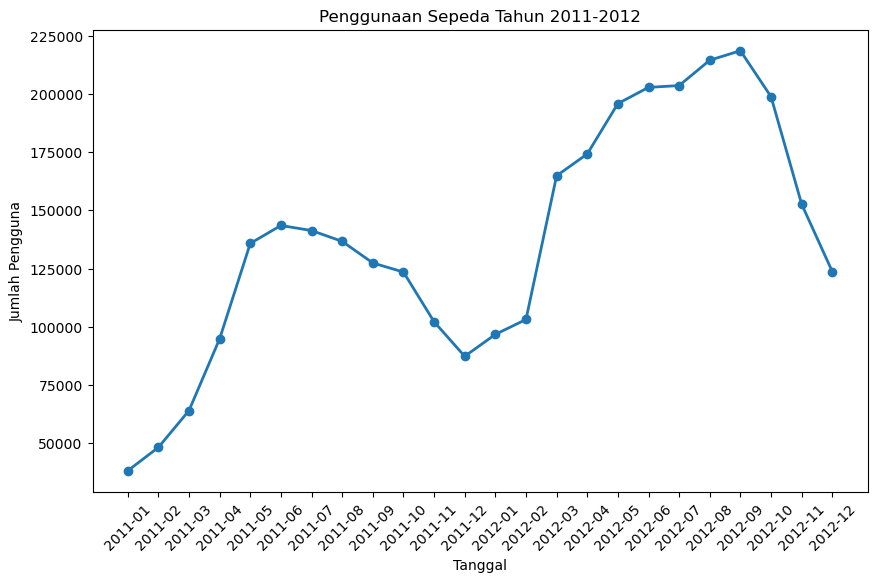

In [96]:
day_used_df = all_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

day_used_df.index = day_used_df.index.strftime('%Y-%m')
day_used_df = day_used_df.reset_index()

day_used_df.rename(columns={
    "cnt": "jumlah_pengguna"
}, inplace=True)

# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(day_used_df['dteday'], day_used_df['jumlah_pengguna'], marker='o', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Sepeda Tahun 2011-2012')
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=10)
# Menampilkan grafik
plt.show()



*Berdasarkan visualisasi data, dapat dilihat seperti ada tren naik dan musiman. Dapat dilihat juga bahwa setiap akhir tahun seperti mengalami penurunan*

*3. Lalu kita akan melihat performa penggunaan pada bulan terakhir tahun 2012*

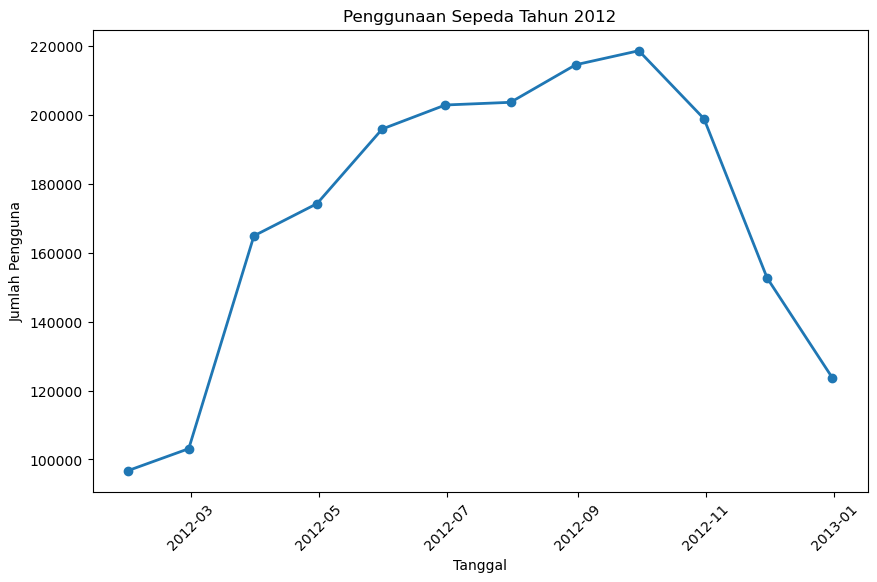

In [95]:
day_used_df = all_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

day_used_df.rename(columns={
    "cnt": "jumlah_pengguna"
}, inplace=True)

tahun_kedua = day_used_df['2012-01-01':'2012-12-31']
# Membuat line chart
plt.figure(figsize=(10, 6))
plt.plot(tahun_kedua.index, tahun_kedua['jumlah_pengguna'], marker='o', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.title('Penggunaan Sepeda Tahun 2012')
plt.xticks(fontsize=10, rotation = 45) 
plt.yticks(fontsize=10)
# Menampilkan grafik
plt.show()

*Berdasarkan visualisasi di atas, kita dapat melihat bahwa jumlah pengguaan sepeda mengalami penurunan pada bulan Oktober sampai dengan bulan desember*

### Pertanyaan 2 : Bagaimana distribusi penggunaan sepeda berdasarkan musim?

*1. Kita akan membuat DataFrame yang memuat informasi yang dibutuhkan untuk menjjawab pertanyaan ini.*

In [ ]:
season_used_df = all_df.groupby('season').agg({
    'cnt':"sum"
})
season_used_df=season_used_df.reset_index()
season_used_df.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


*2. Setelah itu kita akan memvisualisasikan dalam bentuk bar plot*

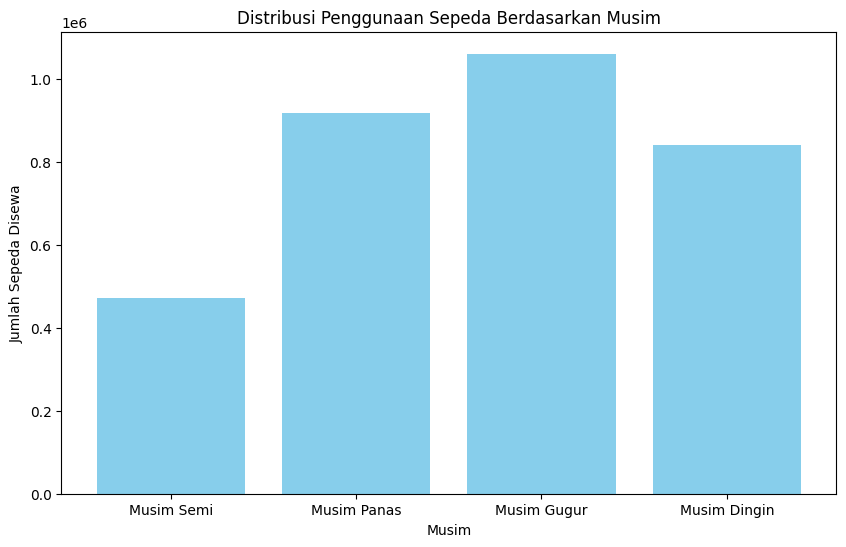

In [ ]:
season_used_df = all_df.groupby('season').agg({
    "cnt": "sum"
})
season_used_df=season_used_df.reset_index()

plt.figure(figsize=(10, 6))
plt.bar(x='season', height='cnt', data= season_used_df,color='skyblue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim')
plt.xticks(ticks=season_used_df['season'], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

*Dari bar plot diatas dapat dilihat bahwa penggunaan (penyewa sepeda) pada musim gugur lebih tinggi dibandingkan musim lainnya*

*3. Kita juga dapat memvisualisasikan ini menjadi bentuk pie chart*

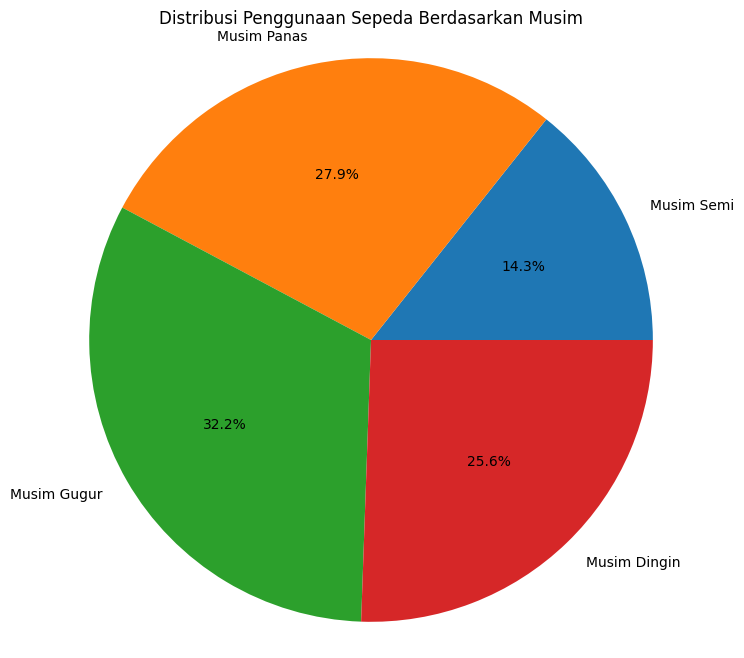

In [ ]:
season_pie_used_df = all_df.groupby('season').agg({
    "cnt": "sum"
})
season_pie_used_df=season_pie_used_df.reset_index()

plt.figure(figsize=(8, 8))
Nama = ('Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin')
plt.pie(x='cnt', data=season_pie_used_df, labels= Nama, autopct='%1.1f%%')
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Musim')
plt.axis('equal')
plt.show()

*Dari pie plot diatas dapat dilihat bahwa penggunaan (penyewa sepeda) pada musim gugur lebih tinggi dibandingkan musim lainnya*

### Pertanyaan 3 : Bagaimana korelasi antara kecepatan angin dengan jumlah penyewa sepeda?

*1. Untuk menjawab pertanyaan ini, kita akan menggunakan function scatter() untuk membuat visualisasi*

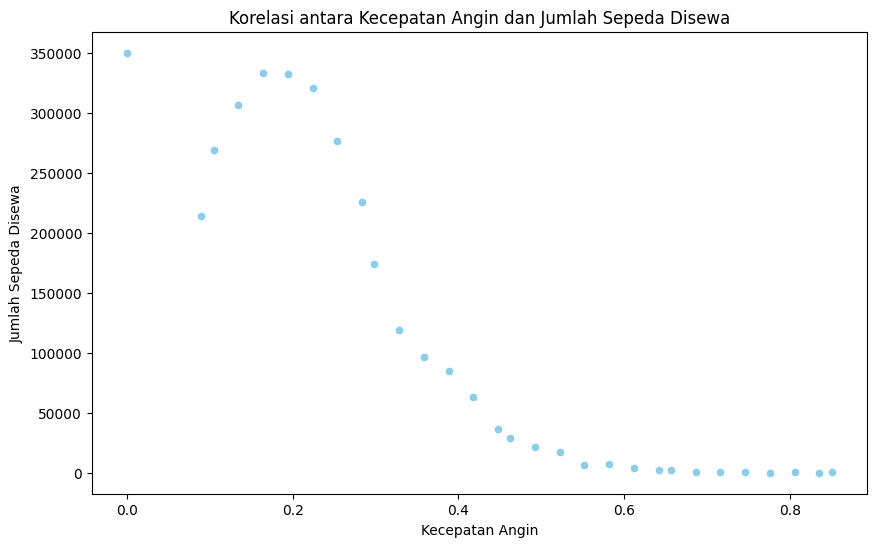

In [ ]:
windspeed_used_df = all_df.groupby('windspeed').agg({
    "cnt": "sum"
})
windspeed_used_df=windspeed_used_df.reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='cnt', data=windspeed_used_df, color='skyblue')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Korelasi antara Kecepatan Angin dan Jumlah Sepeda Disewa')
plt.show()

*Untuk mempermudah dalam melihat korelasi atau hubungan antar variabel, kita bisa menggunakan function regplot()*

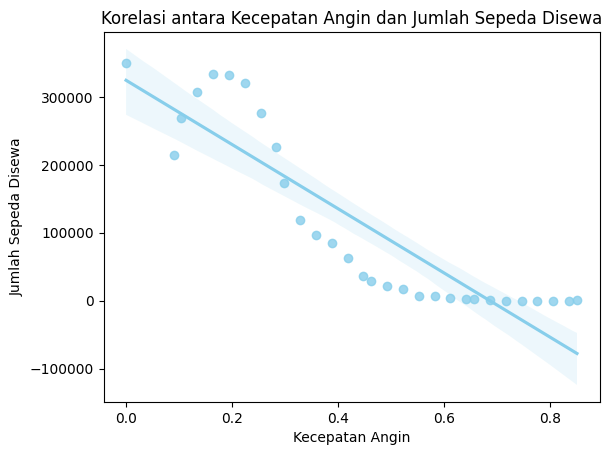

In [ ]:
sns.regplot(x='windspeed', y='cnt', data=windspeed_used_df, color='skyblue')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Korelasi antara Kecepatan Angin dan Jumlah Sepeda Disewa')
plt.show()

*Pada Visualisasi data diatas, pita di sekitar garis menunjukkan tidak adanya korelasi antara kecepatan angin dan jumlah sepeda disewa*

In [40]:
all_df.to_csv("all_data.csv", index=False)

## Analisis ANOVA

### Pertanyaan 4 : Apakah terdapat perbedaan signifikan dalam jumlah penggunaan antara musim-musim tersebut?



*1. Untuk menjawab pertanyaan ini, kita dapat menggunakan analisis lanjutan yaitu analisis anova.*

In [72]:
model = ols('cnt ~ C(season)', data=all_df).fit()

tabel_anova = sm.stats.anova_lm(model)

print(tabel_anova)

                df        sum_sq       mean_sq           F         PR(>F)
C(season)      3.0  3.772936e+07  1.257645e+07  409.181037  7.401071e-257
Residual   17375.0  5.340322e+08  3.073567e+04         NaN            NaN


*Dari tabel anova diatas diperoleh p value < 0,05. Sehingga tidak terdapat perbedaan signifikan dalam penyewaan antara musim tersebut* 

## Conclusion

1. Performa pada penyewaan sepeda dapat dilihat dari line chart, dimana menunjukkan penurunan pada bulan Oktober hingga Desember.
2. Distribusi penggunaan/penyewaan sepeda jika ditingkatkan dari tertinggi ke rendah terdapat pada musim gugur, musim panas, musim dingin, dan musim semi.
3. Berdasarkan p-value yang diperoleh sebesar < 0.05 dimana dapat diartikan bahwa tidak terdapat perbedaan signifikan dalam penyewaan antara masing-masing musim.
4. Pada visualisasi data yang diperoleh, menunjukkan bahwa tidak ada korelasi antara kecepatan angin dan jumlah sepeda disewa.